In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [10]:
# Import data from sklearn

x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

# Make data into tensor data
X = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

In [13]:
# design the model
model = nn.Linear(n_features, 1)

# define the loss (criterion)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

n_epochs = 100

Epoch 10; loss: 499.1183 ; 
Epoch 20; loss: 454.1311 ; 
Epoch 30; loss: 421.3279 ; 
Epoch 40; loss: 397.3978 ; 
Epoch 50; loss: 379.9340 ; 
Epoch 60; loss: 367.1841 ; 
Epoch 70; loss: 357.8726 ; 
Epoch 80; loss: 351.0699 ; 
Epoch 90; loss: 346.0989 ; 
Epoch 100; loss: 342.4652 ; 


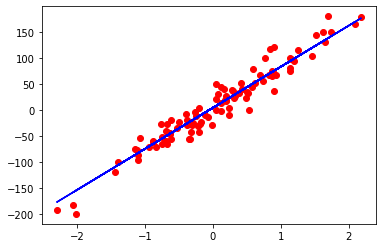

In [15]:
for epoch in range(n_epochs):
  # forward pass
  y_pred = model(X)

  # loss 
  loss = criterion(y_pred, y)

  # backward pass / calculate the gradients
  loss.backward()

  # update the weights
  optimizer.step()
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'Epoch {epoch+1}; loss: {loss.item():.4f} ; ')

# plot - This will not modify the gradient calculation function
predicted  = model(X).detach().numpy()
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()

